In [1]:
import warnings
import os
import tensorflow as tf

warnings.filterwarnings('ignore')  # Ignore all warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow messages
tf.get_logger().setLevel('ERROR')  # Set TensorFlow logger to only show errors

In [2]:
import os
import cv2
import tensorflow as tf
import tf_keras
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
data_dir = 'data/Train'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(224, 224), batch_size=32)
data = data.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 23650 files belonging to 2 classes.


In [5]:
batch[0].max()

1.0

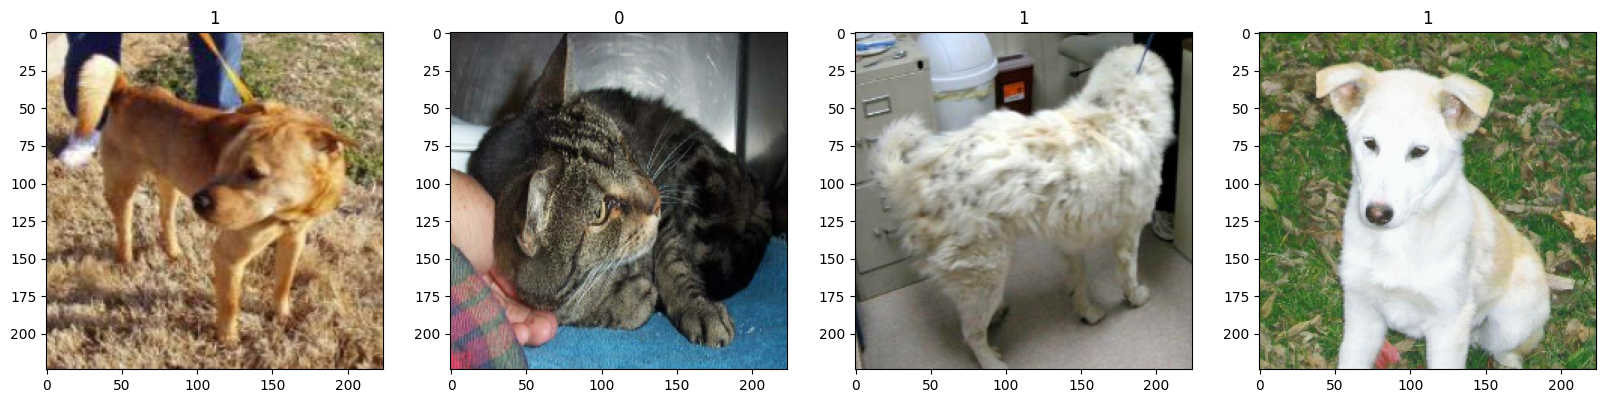

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) # no int as after lamba function, these aren't int.
    ax[idx].title.set_text(batch[1][idx])

In [7]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.3)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [8]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [9]:
hub_layer_wrapper = tf.keras.layers.Lambda(lambda x: pretrained_model(x))

model = Sequential([hub_layer_wrapper])
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [10]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [12]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
518/518 ━━━━━━━━━━━━━━━━━━━━ 301s 582ms/step - accuracy: 0.9903 - loss: 0.0261 - val_accuracy: 0.9871 - val_loss: 0.0363
Epoch 2/5
518/518 ━━━━━━━━━━━━━━━━━━━━ 304s 588ms/step - accuracy: 0.9922 - loss: 0.0229 - val_accuracy: 0.9880 - val_loss: 0.0374
Epoch 3/5
518/518 ━━━━━━━━━━━━━━━━━━━━ 290s 560ms/step - accuracy: 0.9926 - loss: 0.0208 - val_accuracy: 0.9880 - val_loss: 0.0365
Epoch 4/5
518/518 ━━━━━━━━━━━━━━━━━━━━ 176s 340ms/step - accuracy: 0.9933 - loss: 0.0188 - val_accuracy: 0.9870 - val_loss: 0.0385
Epoch 5/5
518/518 ━━━━━━━━━━━━━━━━━━━━ 176s 340ms/step - accuracy: 0.9946 - loss: 0.0171 - val_accuracy: 0.9847 - val_loss: 0.0451


In [23]:
test_data = tf.keras.utils.image_dataset_from_directory('data/Test', image_size=(224, 224), batch_size=32)
test_data = test_data.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))
data_iterator = test_data.as_numpy_iterator()
batch = data_iterator.next()

Found 3864 files belonging to 2 classes.


In [24]:
batch[0].shape

(32, 224, 224, 3)

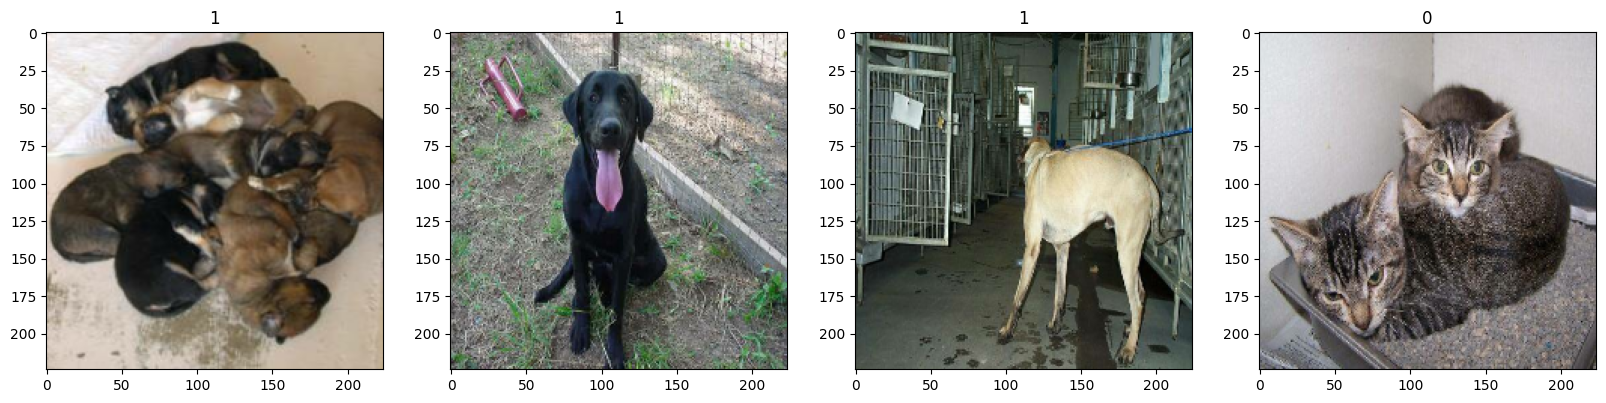

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) # no int as after lamba function, these aren't int.
    ax[idx].title.set_text(batch[1][idx])

In [26]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test_data_iterator: 
    X, y = batch
    X = tf.image.resize(X, (224, 224))
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [30]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9967231, shape=(), dtype=float32) tf.Tensor(0.9848894, shape=(), dtype=float32) tf.Tensor(0.9908994, shape=(), dtype=float32)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Cat


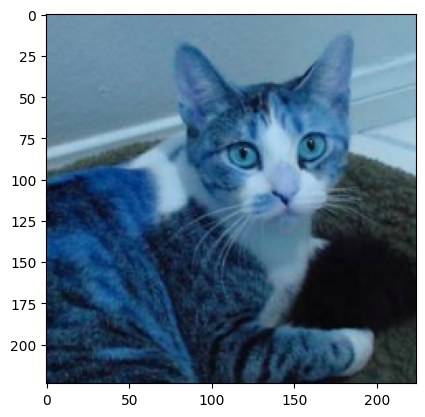

In [33]:
import cv2
import numpy as np

cat_img = cv2.imread('data/Test/Cat/cat.977.jpg')
resize_cat = tf.image.resize(cat_img, (224,224))
yhat = model.predict(np.expand_dims(resize_cat/255, 0))
if yhat > 0.5:
    print('Dog')
else:
    print('Cat')
plt.imshow(resize_cat.numpy().astype(int))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
Dog


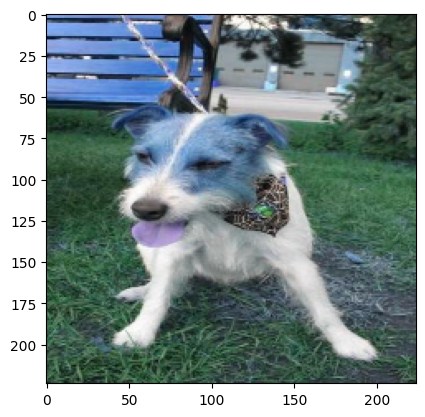

In [29]:
dog_img = cv2.imread('data/Test/Dog/dog.4059.jpg')
resize_dog = tf.image.resize(dog_img, (224,224))
yhat = model.predict(np.expand_dims(resize_dog/255, 0))
if yhat > 0.5:
    print('Dog')
else:
    print('Cat')
plt.imshow(resize_dog.numpy().astype(int))
plt.show()